In [20]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

In [21]:
A = np.array([[0,-1],[2,-4],[2,1],[-4,4],[-4,0]])
b = np.ones(5)


In [36]:
p1 = cvx.Variable(2)
p2 = cvx.Variable(2)
p3 = cvx.Variable(2)
p4 = cvx.Variable(2)
w = cvx.Variable()
h = cvx.Variable()

obj = cvx.Maximize(w*h)

constraints_1 = [A*p1 <= b]
constraints_2 = [A*p2 <= b]
constraints_3 = [A*p3 <= b]
constraints_4 = [A*p4 <= b]
constraints_5 = [p4[0] == p2[0]]
constraints_6 = [p4[1] == p1[1]]
constraints_7 = [p3[0] == p1[0]]
constraints_8 = [p3[1] == p2[1]]
constraints_w = [p1[0]-p2[0]==w]
constraints_w = [p1[1]-p2[1]==h]

constraints = constraints_1 + constraints_2 +constraints_3+constraints_4+constraints_5+constraints_6\
                    +constraints_7+constraints_8

prob = cvx.Problem(obj,constraints)
print(prob)

maximize var485 * var486
subject to [[ 0. -1.]
 [ 2. -4.]
 [ 2.  1.]
 [-4.  4.]
 [-4.  0.]] * var481 <= [1. 1. 1. 1. 1.]
           [[ 0. -1.]
 [ 2. -4.]
 [ 2.  1.]
 [-4.  4.]
 [-4.  0.]] * var482 <= [1. 1. 1. 1. 1.]
           [[ 0. -1.]
 [ 2. -4.]
 [ 2.  1.]
 [-4.  4.]
 [-4.  0.]] * var483 <= [1. 1. 1. 1. 1.]
           [[ 0. -1.]
 [ 2. -4.]
 [ 2.  1.]
 [-4.  4.]
 [-4.  0.]] * var484 <= [1. 1. 1. 1. 1.]
           var484[0] == var482[0]
           var484[1] == var481[1]
           var483[0] == var481[0]
           var483[1] == var482[1]


In [40]:
prob.solve()
prob.value

DCPError: Problem does not follow DCP rules. However, the problem does follow DGP rules. Consider calling this function with `gp=True`.

In [24]:
p2.value

array([-1.10271734e-09, -6.25000000e-02])

(-0.5, 1)

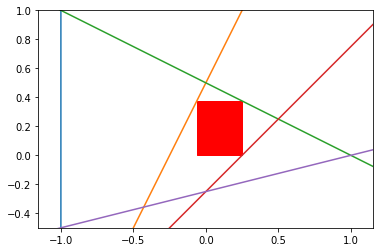

In [17]:
a = np.linspace(-5,10,10000)

fig, ax = plt.subplots()
for i in range(len(b)):
    if A[i][1] != 0:
        y = -(A[i][0]*a -b[i])/(A[i][1])
    else:
        y = -(A[i][0]*a -b[i])
    ax.plot(y, a)

ax.axis('equal')

h = p1.value[0] - p2.value[0]
w = p1.value[1] - p2.value[1]
rectangle=plt.Rectangle((p2.value[1],p2.value[0]),w,h , color='r')
ax.add_artist(rectangle)

ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,1])

In [28]:
p1 = cvx.Variable(2)
w = cvx.Variable(1,nonneg =True)
h = cvx.Variable(1,nonneg =True)

obj = cvx.Maximize(cvx.log(w)+cvx.log(h))

constraints_1 = [A*p1 <= b]
constraints_2 = [A[:,0]*(p1[0]+w)+A[:,1]*p1[1] <= b]
constraints_3 = [A[:,0]*p1[0]+A[:,1]*(p1[1]+h) <= b]

constraints = constraints_1 + constraints_2 +constraints_3

prob = cvx.Problem(obj,constraints)
print(prob)

maximize log(var386) + log(var387)
subject to [[ 0. -1.]
 [ 2. -4.]
 [ 2.  1.]
 [-4.  4.]
 [-4.  0.]] * var385 <= [1. 1. 1. 1. 1.]
           [ 0.  2.  2. -4. -4.] * Promote(var385[0] + var386, (5,)) + [-1. -4.  1.  4.  0.] * Promote(var385[1], (5,)) <= [1. 1. 1. 1. 1.]
           [ 0.  2.  2. -4. -4.] * Promote(var385[0], (5,)) + [-1. -4.  1.  4.  0.] * Promote(var385[1] + var387, (5,)) <= [1. 1. 1. 1. 1.]


In [29]:
prob.solve(verbose = True)
prob.value


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -1.301e+01  +2e+01  4e-01  5e-01  1e+00  1e+00    ---    ---    0  0  - |  -  - 
 1  -1.928e-01  -4.574e+00  +7e+00  1e-01  2e-01  3e-01  3e-01  0.7394  5e-02   1  1  1 |  0  1
 2  +8.682e-01  -8.040e-01  +2e+00  6e-02  7e-02  2e-01  9e-02  0.7833  2e-01   1  1  1 |  3  1
 3  +1.527e+00  +6.999e-01  +8e-01  3e-02  3e-02  8e-02  4e-02  0.9791  4e-01   1  1  1 |  6  0
 4  +1.801e+00  +1.563e+00  +2e-01  8e-03  1e-02  3e-02  9e-03  0.7833  6e-02   1  1  1 |  2  1
 5  +1.912e+00  +1.846e+00  +5e-02  2e-03  3e-03  8e-03  2e-03  0.7833  6e-02   1  1  1 |  2  1
 6  +1.943e+00  +1.908e+00  +3e-02  1e-03  1e-03  4e-03  1e-03  0.9791  5e-01   1  1  1 |  7  0
 7  +1.957e+00  +1.949e+00  +6e-03  3e-04  3e-04  9e-04  3e-04  0.7833  1e-02   2  1  1 |  1  1
 8  +1.961e+00  +1.959e+00  +1e-03  7e-05  7e-

-1.9616584911206065

In [30]:
p1.value

array([ 1.25000008e-01, -6.99784323e-10])

(-0.5, 1)

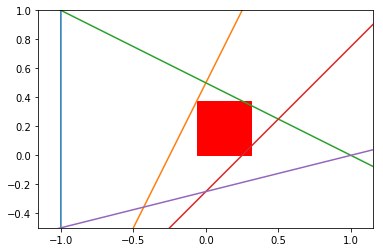

In [31]:
a = np.linspace(-5,10,10000)

fig, ax = plt.subplots()
for i in range(len(b)):
    if A[i][1] != 0:
        y = -(A[i][0]*a -b[i])/(A[i][1])
    else:
        y = -(A[i][0]*a -b[i])
    ax.plot(y, a)

ax.axis('equal')


rectangle=plt.Rectangle((p2.value[1],p2.value[0]),w.value,h.value , color='r')
ax.add_artist(rectangle)

ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.5,1])